In [ ]:
import nltk
nltk.download("all")
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize

from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [ ]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
    
short_pos = open("files/positive.txt","r").read()
short_neg = open("files/negative.txt","r").read()

# move this up here
all_words = []
documents = []


#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

for p in short_pos.split('\n'):
    documents.append( (p, "pos") )
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

    
for p in short_neg.split('\n'):
    documents.append( (p, "neg") )
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())



save_documents = open("files/documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()


all_words = nltk.FreqDist(all_words)


word_features = list(all_words.keys())[:5000]


save_word_features = open("files/word_features5k.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()


def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]


classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

###############
save_classifier = open("files/originalnaivebayes5k.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

save_classifier = open("files/MNB_classifier5k.pickle","wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

save_classifier = open("files/BernoulliNB_classifier5k.pickle","wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

save_classifier = open("files/LogisticRegression_classifier5k.pickle","wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()


LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

save_classifier = open("files/LinearSVC_classifier5k.pickle","wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()


##NuSVC_classifier = SklearnClassifier(NuSVC())
##NuSVC_classifier.train(training_set)
##print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)


SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
print("SGDClassifier accuracy percent:",nltk.classify.accuracy(SGDC_classifier, testing_set)*100)

save_classifier = open("files/SGDC_classifier5k.pickle","wb")
pickle.dump(SGDC_classifier, save_classifier)
save_classifier.close()

10665
Original Naive Bayes Algo accuracy percent: 71.42857142857143
Most Informative Features
                mediocre = True              neg : pos    =     17.0 : 1.0
                 generic = True              neg : pos    =     15.7 : 1.0
               inventive = True              pos : neg    =     15.6 : 1.0
                 routine = True              neg : pos    =     14.4 : 1.0
                  boring = True              neg : pos    =     14.2 : 1.0
                    flat = True              neg : pos    =     13.8 : 1.0
              refreshing = True              pos : neg    =     13.7 : 1.0
                    warm = True              pos : neg    =     12.6 : 1.0
                    lame = True              neg : pos    =     12.3 : 1.0
               wonderful = True              pos : neg    =     12.2 : 1.0
                mindless = True              neg : pos    =     11.7 : 1.0
             mesmerizing = True              pos : neg    =     11.7 : 1.0
      

In [ ]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

documents_f = open("files/documents.pickle", "rb")
documents = pickle.load(documents_f)
documents_f.close()

word_features5k_f = open("files/word_features5k.pickle", "rb")
word_features = pickle.load(word_features5k_f)
word_features5k_f.close()

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features


open_file = open("files/originalnaivebayes5k.pickle", "rb")
classifier = pickle.load(open_file)
open_file.close()

open_file = open("files/MNB_classifier5k.pickle", "rb")
MNB_classifier = pickle.load(open_file)
open_file.close()

open_file = open("files/BernoulliNB_classifier5k.pickle", "rb")
BernoulliNB_classifier = pickle.load(open_file)
open_file.close()

open_file = open("files/LogisticRegression_classifier5k.pickle", "rb")
LogisticRegression_classifier = pickle.load(open_file)
open_file.close()

open_file = open("files/LinearSVC_classifier5k.pickle", "rb")
LinearSVC_classifier = pickle.load(open_file)
open_file.close()

open_file = open("files/SGDC_classifier5k.pickle", "rb")
SGDC_classifier = pickle.load(open_file)
open_file.close()

voted_classifier = VoteClassifier(
                                  classifier,
                                  LinearSVC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

In [ ]:
#consumer key, consumer secret, access token, access secret.
ckey="GeK7Ao2tyYFHj0N8vKwYW1CVT"
csecret="QyzDq31bWdHKkmUj19nDZrQQT30YNz33HknbS8NlqkVk1ukvut"
atoken="1271206585667325953-lwoZXONcSxfYiTc3dZmV0MRuDxb6Of"
asecret="FJETQGF2dGssRXD5Zd66vFKle8rh0LasPFME164ejQ0w4"

class listener(StreamListener):

		def on_data(self, data):

				all_data = json.loads(data)

				tweet = all_data["text"]
				sentiment_value, confidence = sentiment(tweet)
				print(tweet, sentiment_value, confidence)

				if confidence*100 >= 80:
					output = open("files/twitter-out.txt","a")
					output.write(sentiment_value)
					output.write('\n')
					output.close()

				return True

		def on_error(self, status):
				print(status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["Trump"])

RT @SoyAranguibel: PRESTIGIOSAS artistas maracuchonorteamericanas anuncian su próximo concierto de himnos fúnebres en homenaje a su queridí… pos 0.8
RT @Forecast432hz: Sauce Including Screenshots https://t.co/eOVYV6DfgS neg 0.8
RT @eldiario: #10Nov | "Corrupción de las boletas electorales será revelada esta noche a las 9:00 pm", informó el presidente Donald Trump. pos 1.0
RT @AVindman: In the last 24 hours, the Secretary of Defense (SecDef), the Under Secretary of Defense for Policy (USD-P), and the Under Sec… neg 1.0
RT @JuliansRum: Trump is torturing them with silence right now. neg 0.6
RT @catturd2: Breaking ...

70 million Trump voters have fired Fox News. neg 0.8
TRUMP ENTRA EM PÂNICO!
https://t.co/nj11vtl6tw neg 0.8
Has anyone heard or seen a trump health plan in 4yrs🙄but it make sense to take away health care in a pandemic🤡71mil… https://t.co/dMz3vhP20Q neg 0.8
RT @jr19662: Secretary Pompeo: "There Will Be a Smooth Transition of Power to a Second Trump Administration"... https:/

KeyError: ignored

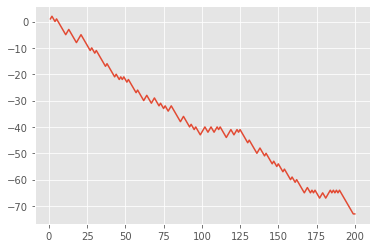

In [ ]:
style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("files/twitter-out.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()